# **Filtering data with Fourier Transforms in 1D and 2D**



---


##### *by [Hannah Hasson](https://hrhasson.github.io/) (Sandia)*
&nbsp;

Today we are going to do some very funky and fun data manipulation that allows us to modify and filter signals very easily and quickly.

I highly recommend that later you check out [this YouTube video](https://www.youtube.com/watch?v=spUNpyF58BY) by 3Blue1Brown, who has made excellent visual explanations of Fourier transforms and lots of other math!

## Developing intuition about Fourier transforms: Unblending the smoothie

What is a Fourier transform? Don't let the fancy words intimidate you; effectively what we are doing is taking some blended signal and finding the original simple components that combine to make it. Think of it like starting with a smoothie and pressing a button that turns it back into milk, banana, strawberry, etc. Yum.

&nbsp;

<p align="center">
  <img width="150" src="https://www.cubesnjuliennes.com/wp-content/uploads/2021/03/Banana-Strawberry-Smoothie-2.jpg">  ->  <img width="300" src="https://www.cubesnjuliennes.com/wp-content/uploads/2021/03/Banana-Strawberry-Smoothie-Ingredients.jpg">
</p>

&nbsp;

The Fourier transform is a mathematical operation that **takes some repeating signal in space or time (think sine/cosine waves) and identifies all the frequencies present**. Fourier transforms can be done analytically if you have a function, but when you have data points and don't have a function fit to them, we can use the numerical tools built into python.

&nbsp;

**The philosophy of the Fourier transform is: assume any set of data with repeating patterns can be very closely approximated by adding some amount of sin and cos waves of different frequencies/amplitudes together.** In this way, the original signal is our smoothie, and the sine and cos functions we combine to approximate it are our ingredients.

&nbsp;

For example: Let's remind ourselves what it might look like to add two sine functions with different frequencies together.

<p align="center">
  <img width="500" src="https://i.stack.imgur.com/k5uDM.png">
</p>

&nbsp;

The more sine waves you add, the sharper details you can get in your pattern:

<p align="center">
  <img width="700" src="https://www.compadre.org/osp/EJSS/4487/T09_Fourier/sinesadd4.jpg">
</p>


&nbsp;

[This website](https://www.jezzamon.com/fourier/) offers a great interactive tool to play around with the amount of frequencies used to approximate a curve. Let's click on this and play around with it for a moment now.

&nbsp;

What a Fourier transform does is break up the curve on the right into the series of curves on the left that it's made of. Each of those frequencies present can then be represented by one point in **frequency space**, where its amplitude corresponds to how strong the signal at that frequency is.

&nbsp;

So instead of your original amplitude vs. time plot or an amplitude vs. position plot, the Fourier transform would give you an **amplitude vs. frequency plot**!


&nbsp;

Let's try making these ourselves! First we are going create some 1D data and do a Fourier transform of that; then we will use our knowledge of loading in image data (Day 4 of Intro to Python) to do a 2D Fourier transform on some images.

Today we will need a couple of packages for handling images & data:

* [OpenCV](https://docs.opencv.org/master/d3/df2/tutorial_py_basic_ops.html) (cv2) for importing and manipulating images

* [Matplotlib](https://matplotlib.org/) for plotting/displaying things nicely

* [Numpy](https://numpy.org/doc/stable/user/tutorials_index.html), our old friend that we use to handle arrays

Let's import these all now

In [51]:
import cv2
import matplotlib.pyplot as plt #the usual way we name this
import numpy as np #again, the usual way we name this

#Set the default plot size
import matplotlib
matplotlib.rcParams['figure.figsize'] = (5, 3)



---

# **Fourier transforms of 1D data**


---



&nbsp;

Let's start off by making some simple 1-D data. First let's just make a list of x-values and then make a list of y-values that follow sin(x) and plot it up:

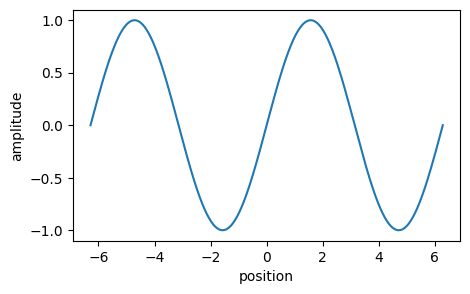

In [52]:
xvals = np.linspace(-2*np.pi,2*np.pi,500)
yvals = np.sin(xvals)

plt.plot(xvals,yvals)
plt.xlabel("position")
plt.ylabel("amplitude")
plt.show()

Cool! Looks like a sine curve, as it should. So before we take a Fourier transform (FT) of this curve, what do we expect? How many frequencies are present?

&nbsp;

We will now take the Fourier transform of the 1D data using the function **fft** from the numpy subpackage [numpy.fft](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html#numpy.fft.fft) which we will just call with

    np.fft.fft(ydata)

Let's do this to our sine wave:

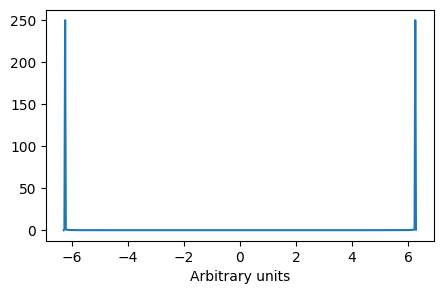

In [53]:
ft_sin = np.fft.fft(yvals)

plt.plot(xvals, np.abs(ft_sin)) #arbitrary x values and absolute value of the fft function
plt.xlabel("Arbitrary units")
plt.show()

This is a single frequency corresponding to our one sine wave! But wait....



I'm sure you have several questions right now:

1. Why the heck are there 2 lines if there's only one frequency?
2. Why are the lines wide at the bottom?
3. Why are we taking the absolute value to plot?
4. How do we get the frequency on the x-axis?

Here are my answers:

1. **Negative frequencies in Fourier space come from reading the data backwards**. The math doesn't know what order your data is supposed to be in, so it goes forward and backward! You are probably now thinking "aren't the frequencies the same forwards and backwards?" Yes, yes they are!
 So Fourier transforms always generate symmetric data with a negative and positive version of whatever frequencies are present.

  **This means you can ignore all the negative frequencies and stick to the positive side of the axis.**


2. **The fact that our lines aren't perfectly narrow means that there must be small amounts of other freuqncies present**. "Wait a minute" you say, "we just put a single sine wave in???" That is true, but because our data doesn't start and end perfectly with the cycle of the signals, it has data hanging out on the edges (beginning and end). This makes the algorithm confused when it tries to repeat the signal (imagine making a copy of this signal and taping it onto the end of the original signal-there would be a huge jump where they connect). This makes the algorithm think that there must be little pieces of other frequencies that add to get the drop-offs at the edges. One way to ease this effect is by doing something called ["windowing,"](https://en.wikipedia.org/wiki/Window_function) which basically forces the signal to go smoothly to zero at both ends. This makes it connect nicely when repeated.

3. Why do we take the absolute value? Fourier transforms output data with complex numbers, but we don't want to plot in the complex plane. **By taking the absolute value, we basically sum the real and imaginary legs of the triangle and get the hypotenuse in real numbers that we can plot!**

4. This is where another function from the numpy.fft package comes in: **fftfreq.** This function will compute the frequency axis for you if you supply the number of data points and the spacing between each:


    np.fft.fftfreq(npoints, d = spacing)

&nbsp;

Let's compute this now and plot again with **frequency** now on the x-axis:

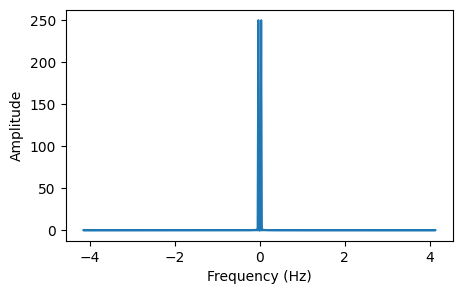

In [54]:
freq = np.fft.fftfreq(xvals.shape[-1], d = (60/499)) #because our axis goes from -30 to 30 and has 500 values

plt.plot(freq, np.abs(ft_sin))
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")
plt.show()

*Ta-da!* I want you to play with doing this to as many other functions as you can think of and see if the result makes sense to you. For example, let's try adding two different sine functions:

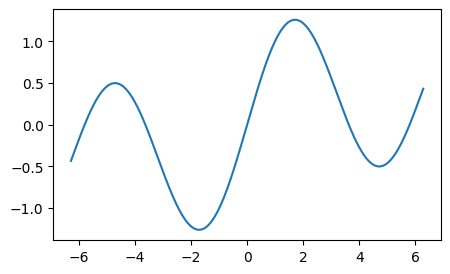

In [55]:
def multi(x):
  y = np.sin(x)+ 0.5*np.sin(x/3)
  return y

multi_y = multi(xvals)

plt.plot(xvals, multi_y)
plt.show()

Pretty funky, eh? Let's check out its Fourier spectrum

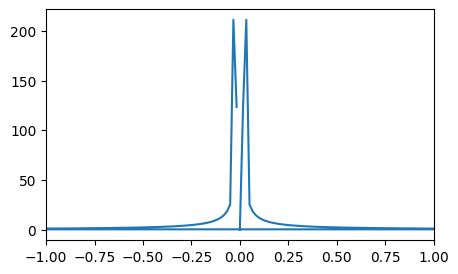

In [56]:
ft_multi = np.fft.fft(multi_y)

plt.plot(freq, np.abs(ft_multi))
plt.xlim(-1,1)
plt.show()

Just as we shold expect: 2 frequencies!

</br>

Let's take one more quick moment to look at what happens if our space/time interval for our repeating signal perfectly matches up with the frequency of the signal. **That is, what happens if the signal has the same value at both the start and end of the data, such that it perfectly connects when you repeat it?**. Let's find out by making our interval some whole number of pi where the start and end value are at the same point in the cycle:

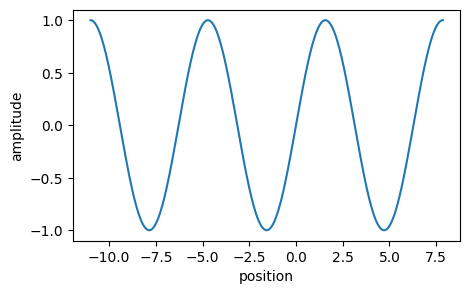

In [57]:
xvalspi = np.linspace(-3.5*np.pi,2.5*np.pi,500)
yvalspi = np.sin(xvalspi)

plt.plot(xvalspi,yvalspi)
plt.xlabel("position")
plt.ylabel("amplitude")
plt.show()

See how now if you repeated the signal again where it ends, it would continue perfectly smoothly (without any jumps). Feel free to play around with the start and end values of the interval. Let's see what the Fourier transform of that looks like.

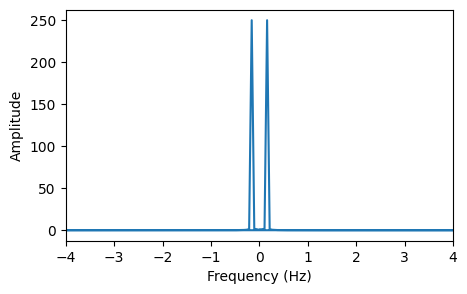

In [58]:
ft_sinpi = np.fft.fft(yvalspi)
freqpi = np.fft.fftfreq(xvalspi.shape[-1], d = (6*np.pi/499)) #because our axis goes from -2.5pi to 3.5pi and has 500 values

plt.plot(freqpi, np.abs(ft_sinpi))
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")
plt.xlim((-4,4))
plt.show()

Now we see that, because the signal wraps back around smoothly when repeating, the Fourier transform function is able to more precisely identify what the real frequency present is. Scroll back up to the first Fourier transform we did to compare!

Now we are only really limited by the number of data points we have (more points = closer to a perfectly smooth curve = easier to identify frequencies).


## Question 1: Try this on your own with another function of your choosing below by filling in whatever function you want and selecting whatever interval you want for your data. Plot both the function and its Fourier transform.

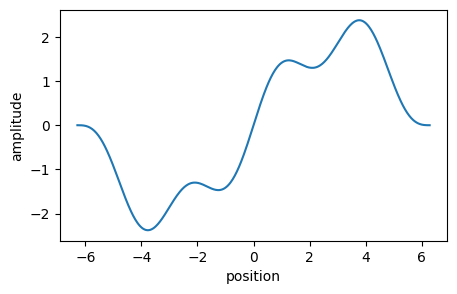

In [59]:
#Answer goes here!
xvals1 = np.linspace(-2*np.pi, 2*np.pi, 500)
def wave(x):
    sinWave1 = 2 * np.sin(x / 2)
    sinWave2 = 0.5 * np.sin(2 * x)
    return sinWave1 + sinWave2

yvals1 = wave(xvals1)
plt.plot(xvals1, yvals1)
plt.xlabel("position")
plt.ylabel("amplitude")
plt.show()

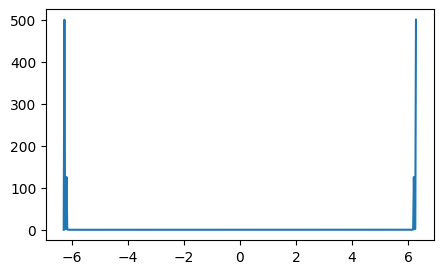

In [60]:
ft1 = np.fft.fft(yvals1)
plt.plot(xvals1, np.abs(ft1))
plt.show()

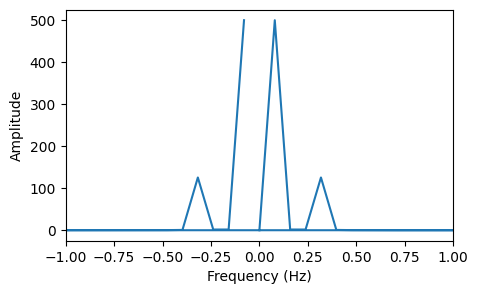

In [61]:
freq1 = np.fft.fftfreq(xvals1.shape[-1], d = (4*np.pi / 499)) #because our axis goes from -30 to 30 and has 500 values

plt.plot(freq1, np.abs(ft1))
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")
plt.xlim((-1,1))
plt.show()

&nbsp;

---

# **Fourier transforms of 2D data**


---

Now we will try doing this same sort of transformation in 2D!!!

&nbsp;

## **A reminder of how to load & display image data**

We will start with a quick refresher on how to import an image into python and display it.

In Google Colab, you will have to upload the file before you use it in a notebook. This is not needed if you install and run python on your computer, but since Colab doesn't save your files, you'll have to feed it the file whenever you re-open the notebook. Here's what to do:

1. Click on the picture of the folder on the lefthand sidebar. You should now be in the "Files" menu.
2. Click the picture of the paper with an up arrow, and then select the file from your computer. For this lesson, I have uploaded a sample picture of my favorite meme called "spidermen.jpeg" to the drive for you to download to your computer. Upload that file here now.

&nbsp;

Now that we have our file uploaded to Colab, let's load it into python. We use `cv2` to read our color image into python as a greyscale image (the "0" in `imread` means grayscale). This takes the pixel values for each color and combines them to one single value per pixel. We will name the image "img" for now.

In [64]:
# Load an color image in grayscale
img = cv2.imread('spidermen.jpeg',0)

# Let's see what type of data we have
type(img)

numpy.ndarray

Notice that the image is just a 2D numpy array of pixel values, with the position in the matrix corresponding to the pixel position in the image and pixel value corresponding to how bright the pixel is.

&nbsp;

To display the image, we use matplotlib (plt) like we usually do, but instead of the familiar *plt.plot()* we now use [**`plt.imshow()`**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) since we have a matrix of data.

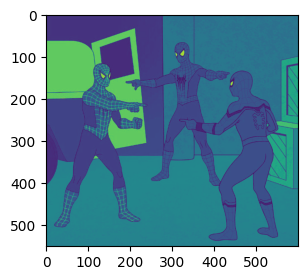

In [66]:
plt.imshow(img)
plt.show()

Notice that it gives the image a weird green/blue color scale, even though the image is in grayscale. You can modify the false color scale of pixel values with the keyword argument **cmap**. There are multiple [colormap options](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) you can choose, but we will stick with grayscale for now:

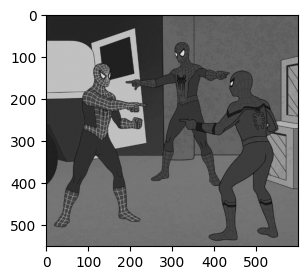

In [73]:
plt.imshow(img, cmap = 'grey')
plt.show()

The function that takes the Fourier transform of 2D data is nearly identical to the 1D case: [numpy.fft.fft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html#numpy.fft.fft2). Let's try it. We will plot in log10 because it makes the subtle features stand out much more in our spectrum.

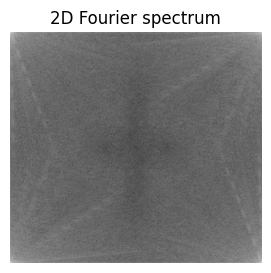

In [74]:
# Take the 2D Fourier transform
img_fft = np.fft.fft2(img)

# Plot
plt.imshow(np.log10(np.abs(img_fft)), cmap = 'gray') # plot in log10 so it's easier to see
plt.axis('off')
plt.title("2D Fourier spectrum")
plt.show()

This is kinda weird looking, huh? You're probably wondering what the heck we're looking at. The x-axis here is frequency in the x direction, and the y-axis is frequency in the y direction.

&nbsp;

*Except* due to the way the algorithm works, the zero-frequency is at the outermost corner of the images... Let's fix this by using the function [`numpy.fft.fftshift()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html) to move the zero-frequency point to the center:

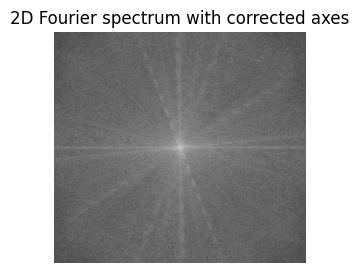

In [75]:
img_ffts =  np.fft.fftshift(img_fft)
plt.imshow(np.log10(np.abs(img_ffts)), cmap = 'gray') #plot in log10 so it's easier to see
plt.axis('off')
plt.title("2D Fourier spectrum with corrected axes")
plt.show()

Now we can see and interpret the signal more clearly! We can see that, just like in the 1D case, there is redundant information in the negative frequencies. Now the data is perfectly mirrored across the diagonal from bottom left to top right. This is again extraneous info that doesn't tell us anything extra.

&nbsp;

What do you think that the strong signal in the center means? What about the illuminated x- and y-axes?

## Question 2: I want you to try undoing the FFT by taking an *inverse* Fourier transform! The function for that is [numpy.fft.ifft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html#numpy.fft.ifft2) for 2D Fourier transforms (you can guess what it is for the 1D case probably). Go ahead and look at the documentation and give it a try here!

Use `plt.imshow()` to see the result and make sure the original image came back out. Make sure to take the absolute value because the data is still complex when you undo the FFT!

*Hint*: make sure you undo the `fftshift` before taking the inverse transform. You can do this with [`numpy.fft.ifftshift()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifftshift.html#numpy.fft.ifftshift).

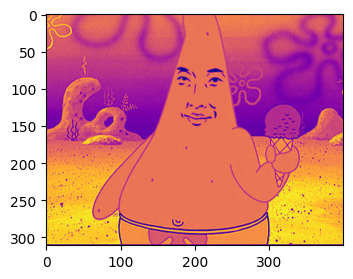

In [88]:
#Code your answer here
img1 = cv2.imread("pat.png", 0)
type(img1)

plt.imshow(img1, cmap = "plasma")
plt.show()

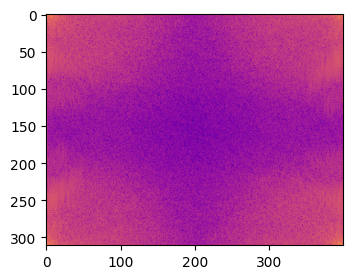

In [90]:
fftImg1 = np.fft.fft2(img1)
plt.imshow(np.log10(np.abs(fftImg1)), cmap = "plasma")
plt.show()

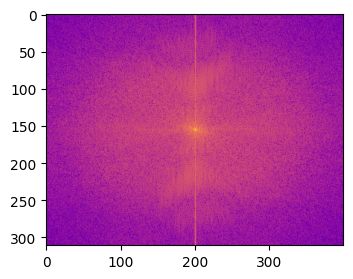

In [91]:
fftsImg1 = np.fft.fftshift(fftImg1)
plt.imshow(np.log10(np.abs(fftsImg1)), cmap = "plasma")
plt.show()

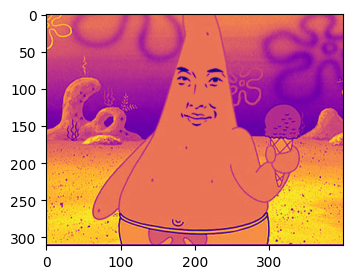

In [94]:
img1Fft = np.fft.ifft2(fftsImg1)
plt.imshow(np.abs(img1Fft), cmap = "plasma")
plt.show()



---

#TAKE A BREAK HERE



&nbsp;

---


# **Using Fourier transforms to filter signals**


---

&nbsp;

Taking the Fourier transform of the data gives us a lot more power than just knowing what frequencies are present: we are going to **modify the Fourier spectrum** before we inverse transform back into the spatial data.

Effectively what we will do is cut out a section of frequencies in frequency space, then revert back to the data and observe that the frequencies we removed are gone! Let's get a move on:

## 1D Fourier filtering

Let's start with 1D. We will take the combination of 2 different sine waves that we demonstrated above:

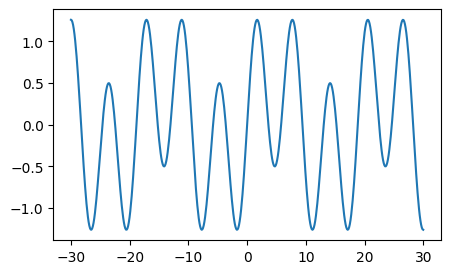

In [95]:
# Putting the function again just for clarity
def multi(x):
  y = np.sin(x)+ 0.5*np.sin(x/3)
  return y

# Make the data
xvals = np.linspace(-30,30,500)
multi_y = multi(xvals)

# Plot
plt.plot(xvals, multi_y)
plt.show()

Let's look at it's Fourier transform again too:

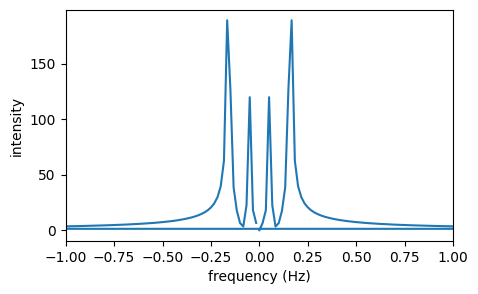

In [102]:
#Take FFT, calculate frequency axis
multi_fft = np.fft.fft(multi_y)
freq = np.fft.fftfreq(xvals.shape[-1], d = (60/499)) #because our axis goes from -30 to 30 and has 500 values

#plot
plt.plot(freq, np.abs(multi_fft))
plt.xlabel("frequency (Hz)")
plt.ylabel("intensity")
plt.xlim(-1,1)
plt.show()

So what if we wanted to remove one of the two frequencies present? It turns out that we can just remove that signal in the Fourier plane. Then, once we take the inverse transform back into the original axes, that frequency should be gone.

Let's try it! We will cut out the negative frequencies since they are redundant, and then cut out the lower freqency so we are only left with the peak on the far right.

&nbsp;

In order to make life a little easier, I am going to shift the order of the data so that the zero-frequency is in the center of the list of data. Just as we did with the 2D data, this is done with [np.fft.fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html). This won't affect the plot, just the order of our data in the array.

In [103]:
#Shift the order of the data
multi_ffts =  np.fft.fftshift(multi_fft) #intensities
freq_shift = np.fft.fftshift(freq) #frequencies

Let's set all the negative frequency info to zero and then check our work by plotting

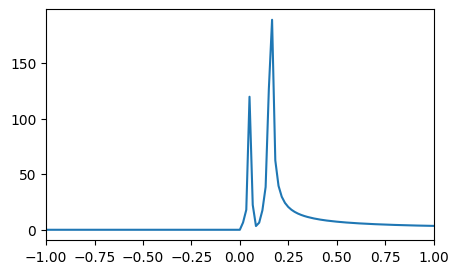

In [104]:
#Find the index of the center element
multi_center = int(len(multi_ffts)/2) #remember indeces are always integers

#Set all elements before the zero-frequency to zero
multi_ffts[:multi_center] = 0

#plot stuff
plt.plot(freq_shift, np.abs(multi_ffts))
plt.xlim(-1,1)
plt.show()

What we just did was called **"masking!"** This means we select a portion of our data to keep and then set the rest to zero.

&nbsp;

Now I'm going to find the locations of the two remaining peaks and get rid of the leftmost one. I'm going to use a function called [scipy.signal.find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html), which outputs the indeces of all peaks present. Don't forget, we must import its package first:

In [110]:
import scipy.signal as s

peaks = s.find_peaks(np.abs(multi_ffts), rel_height=1)
print(peaks)

(array([260]), {})


Note that we had to use the find_peaks function on the *absolute value* of the Fourier data (since it's complex).

Now that we have the indices of the two peaks, lets get rid of everything before the first peak. I'll add a bit to the index to make sure we get rid of the width of the peak too:

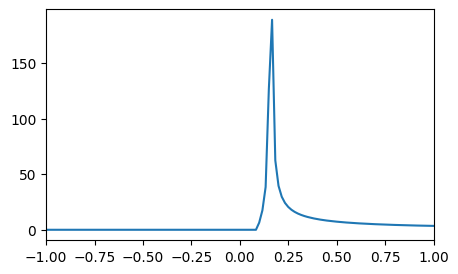

In [109]:
#Set all elements before the first peak to zero
multi_ffts[:256] = 0

#plot stuff
plt.plot(freq_shift, np.abs(multi_ffts))
plt.xlim(-1,1)
plt.show()

Ta-da! Finally, let's shift the frequencies back to the order they were originally in (`np.fft.ifftshift`), and then do the inverse FFT [`np.fft.ifft()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft.html#numpy.fft.ifft) to get back the filtered signal.

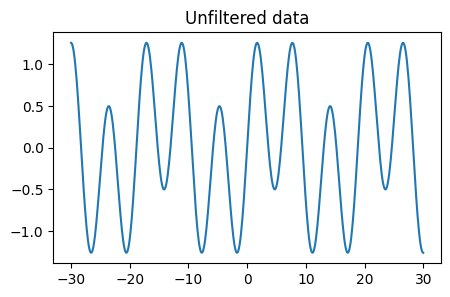

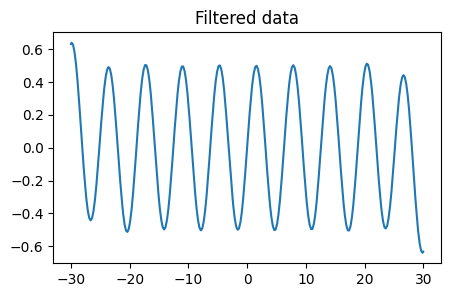

In [111]:
#Un-shift the order of the data
multi_fft_filtered = np.fft.ifftshift(multi_ffts)

#Do the inverse FFT
multi_filtered = np.fft.ifft(multi_fft_filtered).real #we only want the real part when we revert back to the data

#re-plot the old data for comparison
plt.plot(xvals, multi_y)
plt.title("Unfiltered data")
plt.show()

#plot the new filtered data
plt.plot(xvals, multi_filtered)
plt.title("Filtered data")
plt.show()


Et viola! It's certainly not perfect (the edges are funky), but we managed to get rid of the lower frequency in the original plot!

&nbsp;
## 2D Fourier filtering

Now we're bringing out the big guns! **Let's do this on 2D data.** Here is our image and its shifted Fourier transform again:

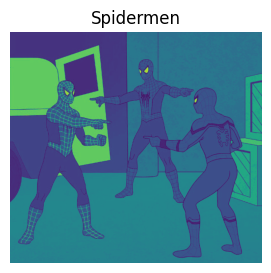

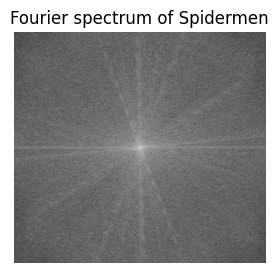

In [112]:
# Plot the image again
plt.imshow(img)
plt.title("Spidermen")
plt.axis('off')
plt.show()


# Plot the shifted FT again
plt.imshow(np.log10(np.abs(img_ffts)), cmap = 'gray') #plot in log10 so it's easier to see
plt.title("Fourier spectrum of Spidermen")
plt.axis('off')
plt.show()

Now how would we filter this kind of data? Remember how I said that we made a **mask** by keeping some section of our data and setting the rest to zero? Well, we're doing that again but in 2D. This time we will be a little more clever though and use matrices.

&nbsp;

Let's say for this example that we want to keep a section in the top half that is 30 pixels by 30 pixels. Here's how we would do that:

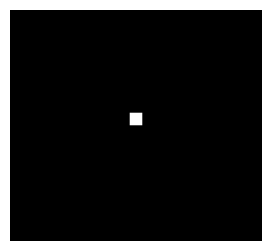

In [113]:
# Get center columns and rows
rows, cols = img_ffts.shape
center_row, center_col = int(rows/2) , int(cols/2)

# create a mask of zeroes first, set our rectangle = 1, leave all remaining as zeros
mask = np.zeros((rows,cols))

#Set the part of the mask we want to keep by indexing the bounds of the box
mask[(center_row-30):center_row, (center_col-15):(center_col+15)] = 1

#Plot
plt.imshow(mask, cmap = 'gray')
plt.axis('off')
plt.show()

So the rectangle we choose to keep is in white with a value of 1 at each point, and the data we are throwing out is in black with a value of 0 at each point.

Let's now multiply every element of this matrix by the corresponding ones in the array of data.

<ipython-input-120-f75f1d8cf90b>:5: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(img_ffts_filtered)), cmap = 'gray') #plot in log10 so it's easier to see


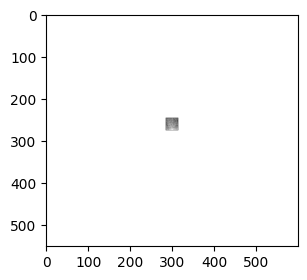

In [120]:
#Multiply the mask by the data
img_ffts_filtered = img_ffts*mask

#Plot the Fourier spectrum with the mask applied
plt.imshow(np.log10(np.abs(img_ffts_filtered)), cmap = 'gray') #plot in log10 so it's easier to see
plt.show()

There we have it! We got rid of all the stuff we don't want. Remember that the negative frequency data is redundant, so we don't need it. That's why everything below the x-axis is gone.

Finally, we can take the inverse 2D FFT of the data and see what image we get back:

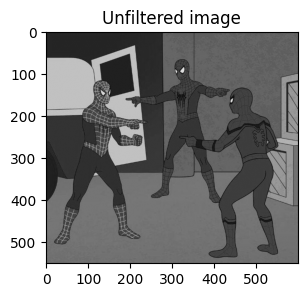

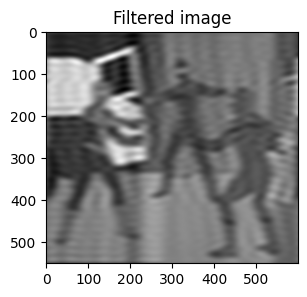

In [134]:
#Un-shift the data before doing the IFFT
img_fft_filtered = np.fft.ifftshift(img_ffts_filtered)

#Take the 2D inverse FFT
img_filtered = np.fft.ifft2(img_fft_filtered) #just keep the real part

#plot unfiltered data for comparison
plt.imshow(img, cmap = 'gray')
plt.title("Unfiltered image")
plt.show()

#Plot filtered data
plt.imshow(np.real(img_filtered), cmap = 'gray')
plt.title("Filtered image")
plt.show()

Whoa, things got blurry! That's because we got rid of most of the high-frequency signal, which is what makes the details in the image! This is the foundation of a technique for [compressing image files](http://www.jeanfeydy.com/Teaching/MasterClass_Radiologie/Part%206%20-%20JPEG%20compression.html)! It makes sense, since the less detail there is, the less data you need to represent the image.

&nbsp;

Try going back and altering the size of the mask, as well as its position! See what effect keeping certain frequencies has on the image.

## Question 3: I want you to redo this process with some other image on your computer! Upload the image to this notebook and write your filtering code below:

Here are the steps:

1. Read in the image with `cv2.imread`
2. Take the 2D FFT of the image with `np.fft.fft2`
3. Shift the data so that the zero frequency is centered using `np.fft.fftshift`
4. Make your mask and multiply it by your shifted filter
5. Inverse shift the data back with `np.fft.ifftshift`
6. Invert the 2D FFT of the image with `np.fft.ifft2`

<ipython-input-147-53b51b4a45fa>:11: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(fftsFiltImg1)), cmap = "grey")


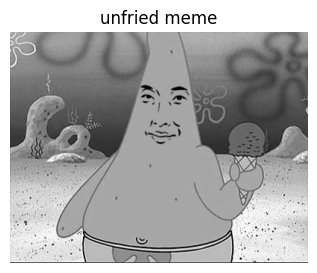

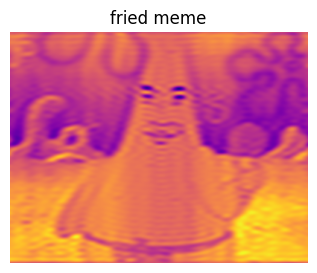

In [147]:
# find center
rows1, cols1 = fftsImg1.shape
centerRow, centerCol = int(rows1 / 2), int(cols1 / 2)

# create mask
mask1 = np.zeros((rows1, cols1))
mask1[(centerRow-40):centerRow, (centerCol-20):(centerCol+20)] = 1

# mask image
fftsFiltImg1 = fftsImg1 * mask1
plt.imshow(np.log10(np.abs(fftsFiltImg1)), cmap = "grey")

# unshift image
fftFiltImg1 = np.fft.ifftshift(fftsFiltImg1)

plt.imshow(img1, cmap = "grey")
plt.title("unfried meme")
plt.axis("off")
plt.show()

filtImg1 = np.fft.ifft2(fftFiltImg1)
plt.imshow(np.real(filtImg1), cmap = "plasma")
plt.title("fried meme")
plt.axis("off")
plt.show()

##**Challenge problem: Circular mask (Homework)**

Here is another function you can use to filter instead of the rectangle. It is a circle that exponentially decays to zero at the edges:

$f(x,y) = e^{-a[(x-b)^2+(y-c)^2]^2}$

&nbsp;

Here's how you would apply it as a mask:

In [ ]:
#Define function for exponentially decaying circle
def filter(x,y,a,b,c):
  f = np.exp(-a*((x-b)**2+(y-c)**2)**2)
  return f

We're going to create a grid of x and y coordinates and then evaluate the function at every point. We can do this easily with a function called [numpy.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html).

&nbsp;

For this example, we want to evaluate our function from $x$ and $y$ that range from [-1.25,1.25] and [-1,1] respectively. So we will create a matrix the same size as our image that has $x$ going smoothly from -1 to 1. And we will create another matrix storing our $y$ values that vary from -1 to 1. We are choosing that for this example because that's what they do in [this textbook](https://www.intechopen.com/books/optical-interferometry/digital-processing-techniques-for-fringe-analysis).

In [ ]:
#Create the meshgrid arrays for u and v
u, v = np.meshgrid(np.linspace(-1.25, 1.25, cols), np.linspace(-1, 1, rows))

#Evaluate the function at each point in the grid
circle_mask = filter(u,v,4000,0.2,0.2)

#Plot the mask we made
plt.imshow(circle_mask, cmap = 'gray')
plt.axis('off')
plt.show()

You should try reproducing this, but playing with the inputs for a, b, c. Note that *a* controls the diameter of the circle, *b* controls the position of the circle in the x-direction, and *c* controls the position in the y-direction.

For example, if I now set a=500, b=0.2 and c=-0.6

In [ ]:
#Evaluate the function at each point in the grid, choose new a,b and c
circle_mask = filter(u,v,500,0.2,-0.6)

#Plot the mask we made
plt.imshow(circle_mask, cmap = 'gray')
plt.axis('off')
plt.show()

All that's left to do is multiply the mask by the image just as we did with the rectangle

In [ ]:
#Multiply the mask by the data
img_ffts_circle = img_ffts*circle_mask

#Plot original FFT for comparison
plt.imshow(np.log10(np.abs(img_ffts)), cmap = 'gray')
plt.axis('off')
plt.show()

#Plot filtered image
plt.imshow(np.log10(np.abs(img_ffts_circle)), cmap = 'gray',vmin= 0) #Use vmin=0 to make image easier to see
plt.axis('off')
plt.show()

Looking at the filtered image in log10 can be a little confusing, but don't worry about the black part of the image. The area in the white circle is all that is really kept. So make sure that when you move the circle around, the white part encompasses the signal you want to keep.

&nbsp;

The rest of the process is exactly like in the above example (inverse shift Fourier transform and then take the inverse FFT).

## Question 4: Try applying this filter to one of your images and moving the circle around/changing its size and see what effect that has on the frequencies filtered out.

In [ ]:
#Code your answer here!


#**The End!**

###If you enjoyed this lesson, you should check out the Part IV track for **Signal and Image Processing (SIP)**! It will teach some cool applications of Fourier transforms for experimental plasma data, as well as some other cool data analysis tools!